# The Use of Matrices in Computer Graphics
### By Shahzeb Khan
For Professor Philley's Linear Algebra class.

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

Let's initialize a square box shape called `box`. Here we are just defining the coordinates needed to make the box. Important to note that computers draw their grid system slightly different than we are use to. The origin `(0,0)` is located at the top left. The y-axis increases downwards. The x-axis is unchanged. Another change in computer graphics is that coordinates are written `(y,x)` instead of `(x,y)`. Both of these changes are a result of CPU's and monitors drawing graphics from the top left downward.

In [51]:
# Define the coordinates for our box
box = np.array([[5,5],
               [6,5],
               [5,6]])
boxLocation = (3, 5); # Where on this grid our box will initially sit

Let's go ahead and define a function called `drawShape` can draw any coordinates onto a grid. We have already defined the coordinates for each point of our box so we will use a package called `trutle` to connect all these coordinates together and draw our shape

In [52]:
def drawShape(coordinates, location):
    figure(1)
    toDraw = np.zeros((10, 10))
    for i in coordinates:
        toDraw[i[0]][i[1]] = 1
    a = imshow(toDraw, interpolation='nearest')
    grid(True)

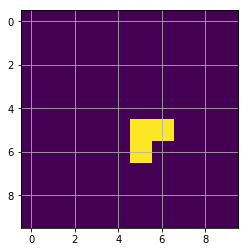

In [53]:
drawShape(box, boxLocation)